In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.sample(10, random_state=2024)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [5]:
df = df.drop_duplicates()
df.shape

(891, 12)

In [6]:
df["PassengerId"].value_counts()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

In [7]:
df["Ticket"].value_counts(dropna=False)

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [8]:
df["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [9]:
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [11]:
df["Survived"] = pd.Categorical(df["Survived"])
df["Pclass"] = pd.Categorical(df["Pclass"])
df["Sex"] = pd.Categorical(df["Sex"])
df["Cabin"] = pd.Categorical(df["Cabin"])
df["Embarked"] = pd.Categorical(df["Embarked"])
df["Age"] = df["Age"].fillna(-1).astype(np.int16, errors = "ignore")

In [12]:
df["Age"] = df["Age"].apply(lambda x : x if x >= 0 else np.nan)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  889 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 38.9 KB


In [14]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.679272,14.536483,0.0,20.0000,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [15]:
df.describe(include="category").T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Sex,891,2,male,577
Cabin,204,147,G6,4
Embarked,889,3,S,644


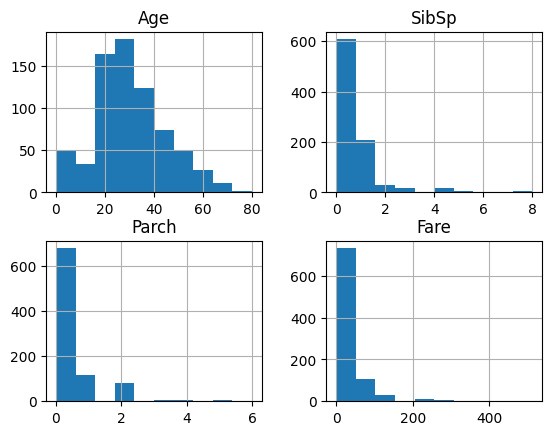

In [16]:
#Analisis univariado

df.select_dtypes(include=np.number).hist()
plt.show()

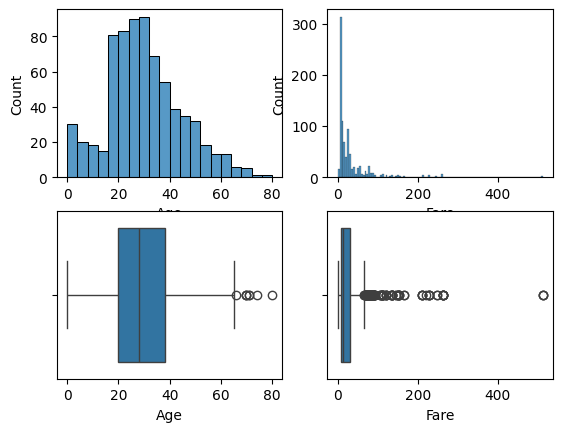

In [17]:
fig,axis = plt.subplots(2, 2)
sns.histplot(ax = axis[0,0], data=df, x="Age")
sns.boxplot(ax=axis[1,0], data = df, x="Age")
sns.histplot(ax=axis[0,1], data = df, x = "Fare")
sns.boxplot(ax=axis[1,1], data = df, x = "Fare")
plt.show()

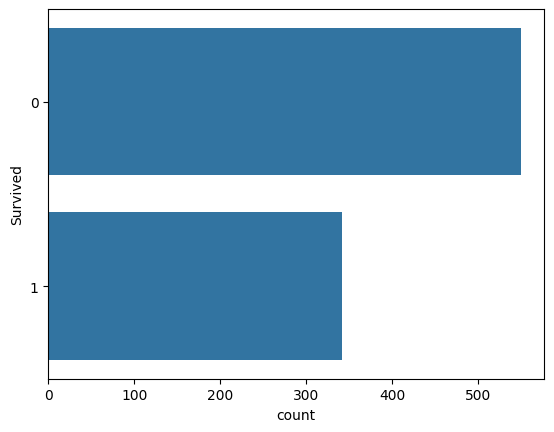

In [18]:
#Analisis univariado categorico

sns.countplot(data=df, y = "Survived")

plt.show()

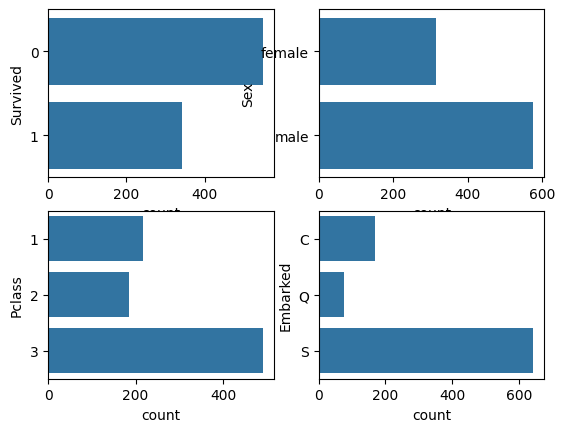

In [19]:
fig, axis = plt.subplots(2,2)

sns.countplot(ax = axis[0,0], data= df, y= "Survived")
sns.countplot(ax = axis[1,0], data= df, y= "Pclass")
sns.countplot(ax = axis[0,1], data= df, y= "Sex")
sns.countplot(ax = axis[1,1], data= df, y= "Embarked")

plt.show()

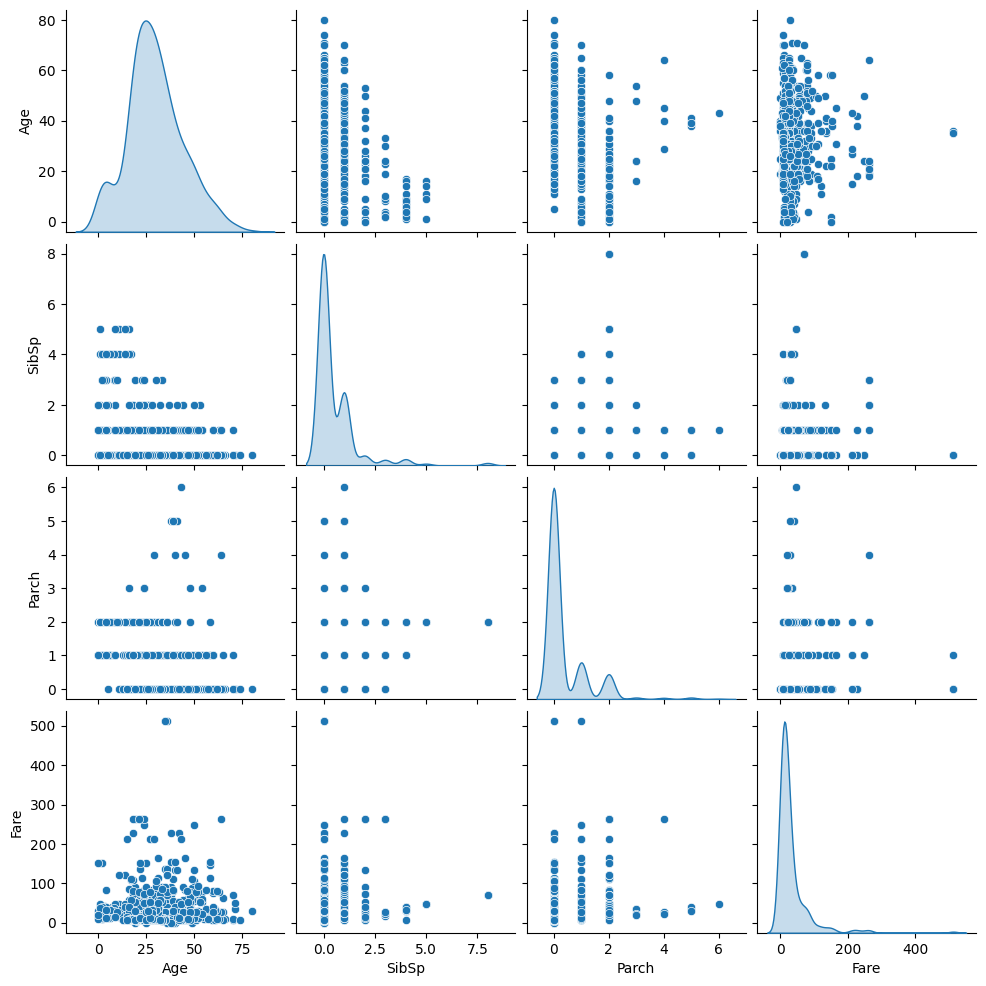

In [20]:
#Analis bivariado numerico - numerico

sns.pairplot(data =  df.select_dtypes(include=np.number), diag_kind='kde')

plt.show()

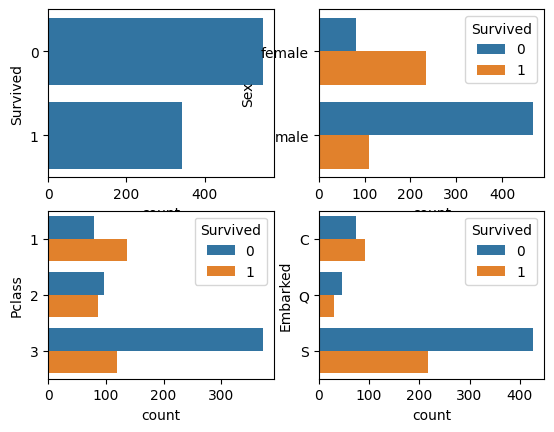

In [21]:
#Analisis bivariado categorico vs categorico

fig, axis = plt.subplots(2,2)

sns.countplot(ax = axis[0,0], data= df, y= "Survived")
sns.countplot(ax = axis[1,0], data= df, y= "Pclass", hue = "Survived")
sns.countplot(ax = axis[0,1], data= df, y= "Sex", hue = "Survived")
sns.countplot(ax = axis[1,1], data= df, y= "Embarked", hue = "Survived")

plt.show()

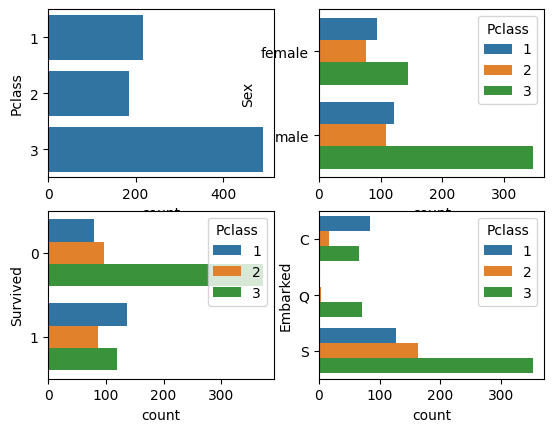

In [22]:
fig, axis = plt.subplots(2,2)

sns.countplot(ax = axis[0,0], data= df, y= "Pclass")
sns.countplot(ax = axis[1,0], data= df, y= "Survived", hue = "Pclass")
sns.countplot(ax = axis[0,1], data= df, y= "Sex", hue = "Pclass")
sns.countplot(ax = axis[1,1], data= df, y= "Embarked", hue = "Pclass")

plt.show()

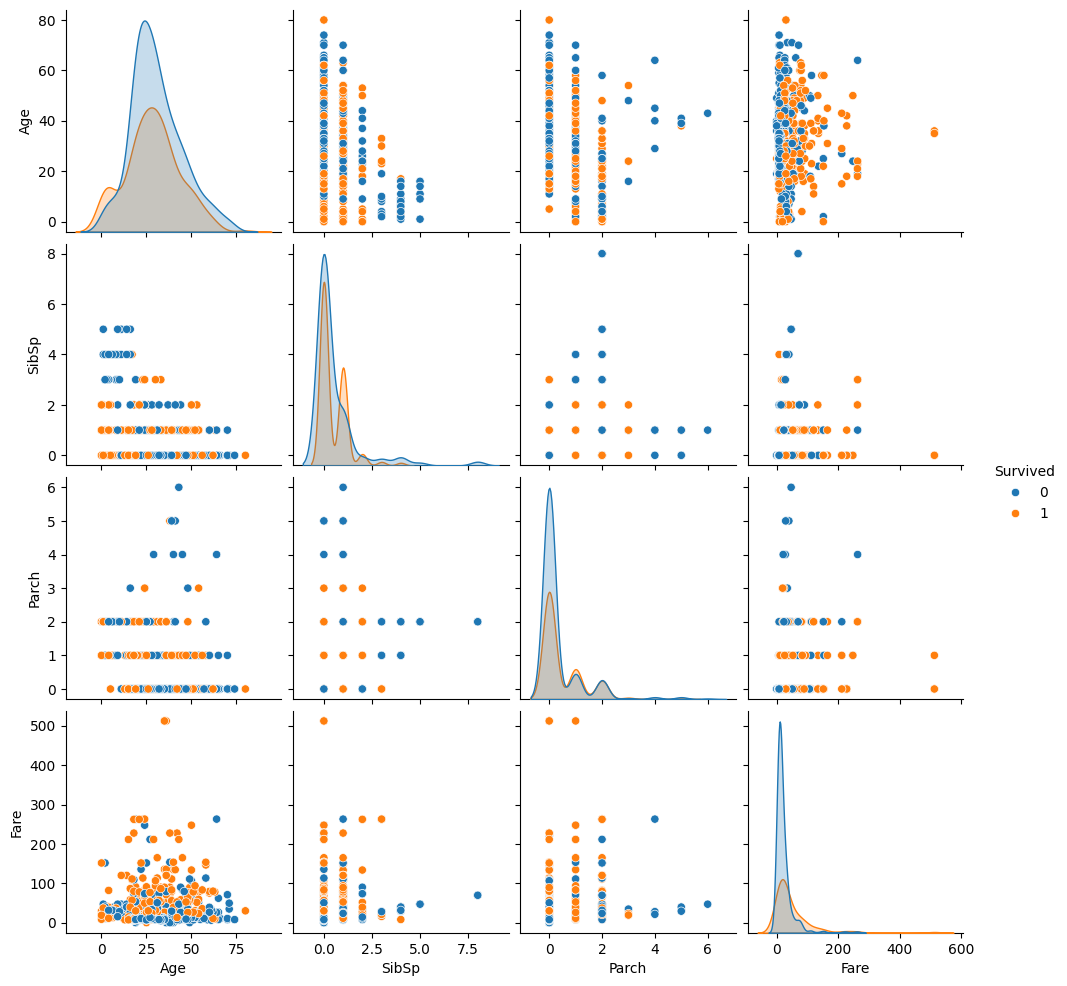

In [24]:
#Analisis bivariado numerico vs categorico

sns.pairplot(data =  df, hue="Survived", diag_kind='kde')
plt.show()